In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import keras
import matplotlib.pyplot as plt
import math
from functions import split_dataset_LSTM, train_model_LSTM, train_model_LSTM_increment
%matplotlib inline

In [2]:
df = pd.read_csv("datasets/nasd_input.csv", header=None, sep='\t')
print("Number of rows and columns:", df.shape)
# df.head(5)

time_array = np.array([x for x in range(len(df.columns))])
df2 = pd.DataFrame(time_array)

N = 5  # number of time series from dataset
training_percent = 0.7
look_back = 60
sc = MinMaxScaler(feature_range=(0, 1))

Number of rows and columns: (100, 731)


In [3]:
# Train model with the whole dataset incrementally
model_N = train_model_LSTM_increment(df, N, training_percent, sc, look_back)

Epoch 1/10
15/15 [==============================] - 1s 86ms/step - loss: 0.1160
Epoch 2/10
15/15 [==============================] - 1s 89ms/step - loss: 0.0247
Epoch 3/10
15/15 [==============================] - 2s 104ms/step - loss: 0.0174
Epoch 4/10
15/15 [==============================] - 1s 78ms/step - loss: 0.0150
Epoch 5/10
15/15 [==============================] - 1s 78ms/step - loss: 0.0154
Epoch 6/10
15/15 [==============================] - 1s 80ms/step - loss: 0.0145
Epoch 7/10
15/15 [==============================] - 1s 84ms/step - loss: 0.0131
Epoch 8/10
15/15 [==============================] - 1s 77ms/step - loss: 0.0134
Epoch 9/10
15/15 [==============================] - 1s 99ms/step - loss: 0.0158
Epoch 10/10
15/15 [==============================] - 1s 91ms/step - loss: 0.0135
Epoch 1/10
15/15 [==============================] - 1s 83ms/step - loss: 0.0101
Epoch 2/10
15/15 [==============================] - 1s 89ms/step - loss: 0.0084
Epoch 3/10
15/15 [====================

Epoch 1/10
15/15 [==============================] - 1s 69ms/step - loss: 0.0902
Epoch 2/10
15/15 [==============================] - 1s 73ms/step - loss: 0.0249
Epoch 3/10
15/15 [==============================] - 1s 84ms/step - loss: 0.0199: 0s - 
Epoch 4/10
15/15 [==============================] - 1s 82ms/step - loss: 0.0159
Epoch 5/10
15/15 [==============================] - 1s 85ms/step - loss: 0.0134
Epoch 6/10
15/15 [==============================] - 1s 80ms/step - loss: 0.0145
Epoch 7/10
15/15 [==============================] - 1s 80ms/step - loss: 0.0153
Epoch 8/10
15/15 [==============================] - 1s 81ms/step - loss: 0.0124
Epoch 9/10
15/15 [==============================] - 1s 83ms/step - loss: 0.0131
Epoch 10/10
15/15 [==============================] - 1s 82ms/step - loss: 0.0144
Epoch 1/10
15/15 [==============================] - 1s 62ms/step - loss: 0.0512
Epoch 2/10
15/15 [==============================] - 1s 69ms/step - loss: 0.0188
Epoch 3/10
15/15 [==============

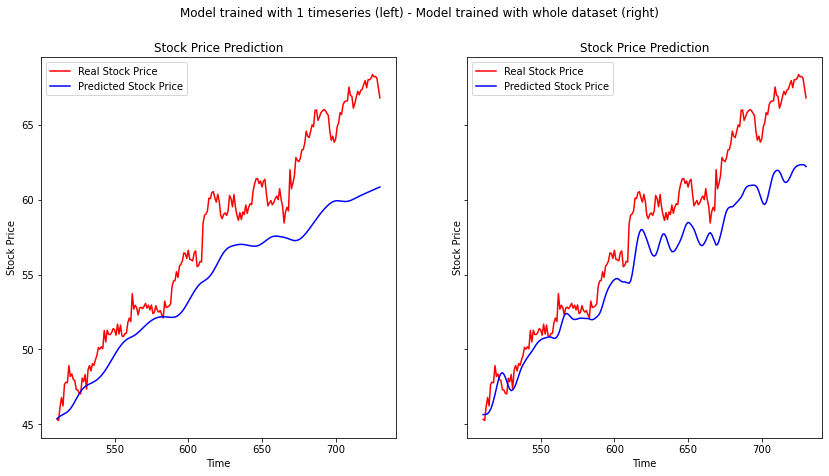

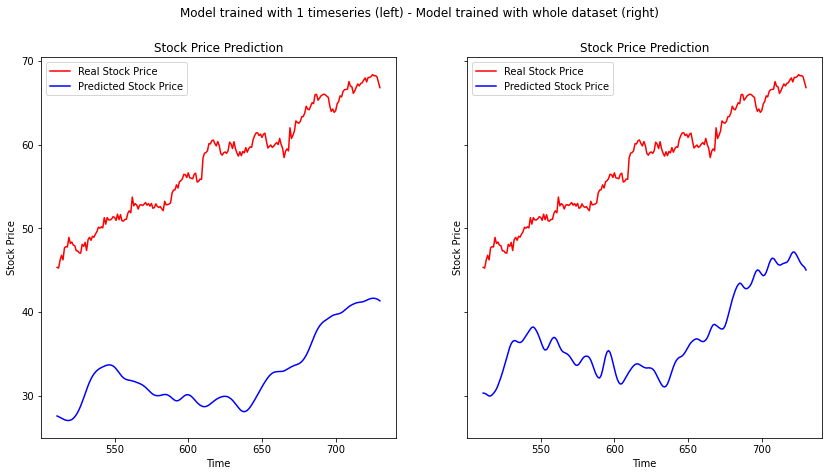

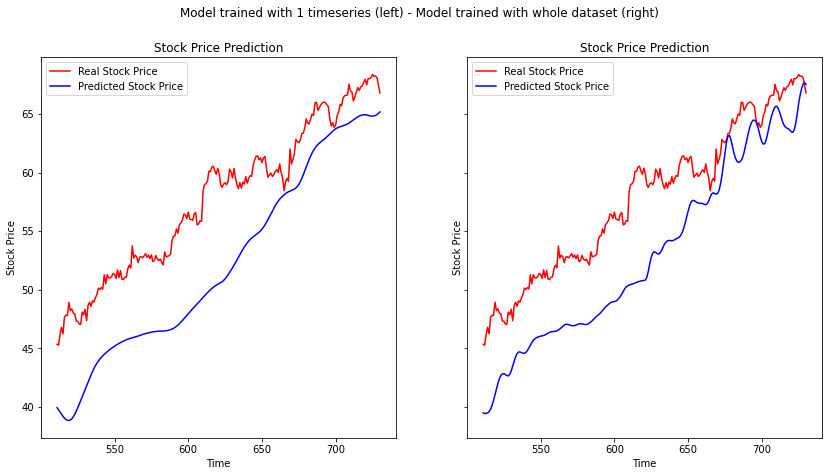

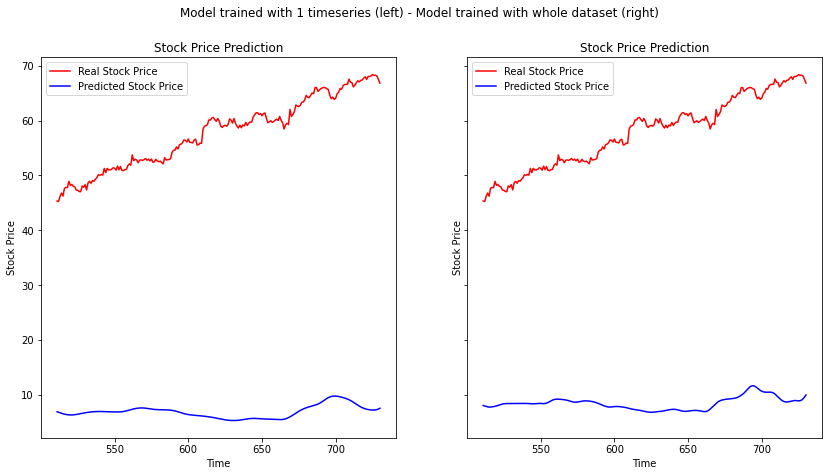

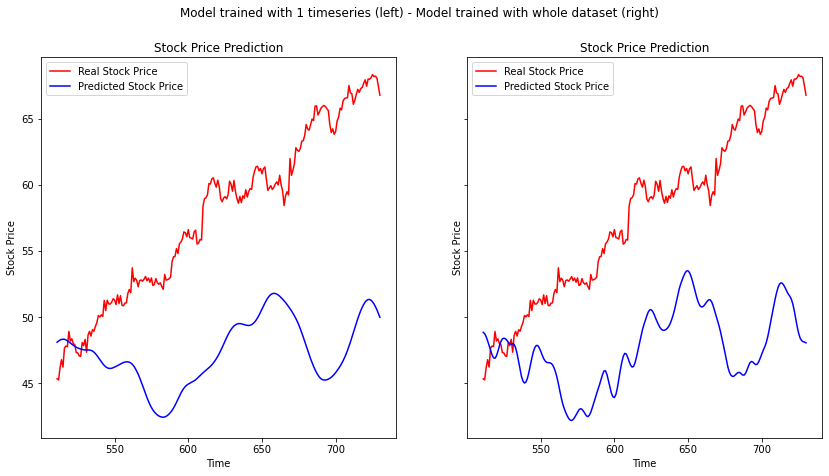

In [4]:
for i in range(N):
    # Creating a data structure with 'look_back' time-steps and 1 output
    X_train, y_train, X_test, train_size = split_dataset_LSTM(
        df, i, training_percent, sc, look_back)

    model = train_model_LSTM(X_train, y_train)

    # Getting the predicted stock price (trained with 1 timeseries)
    predicted_stock_price = model.predict(X_test)
    predicted_stock_price = sc.inverse_transform(predicted_stock_price)

    # Getting the predicted stock price (trained with whole dataset)
    predicted_stock_price_N = model_N.predict(X_test)
    predicted_stock_price_N = sc.inverse_transform(predicted_stock_price_N)

    fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(14, 7))
    fig.suptitle(
        'Model trained with 1 timeseries (left) - Model trained with whole dataset (right)')
    ax1.plot(df2.iloc[train_size:].values, df.iloc[0,
             train_size:].values, color='red', label='Real Stock Price')
    ax1.plot(df2.iloc[train_size:].values, predicted_stock_price,
             color='blue', label='Predicted Stock Price')
    ax1.set_title('Stock Price Prediction')
    ax1.set_xlabel('Time')
    ax1.set_ylabel('Stock Price')
    ax1.legend()
    
    ax2.plot(df2.iloc[train_size:].values, df.iloc[0,
             train_size:].values, color='red', label='Real Stock Price')
    ax2.plot(df2.iloc[train_size:].values, predicted_stock_price_N,
             color='blue', label='Predicted Stock Price')
    ax2.set_title('Stock Price Prediction')
    ax2.set_xlabel('Time')
    ax2.set_ylabel('Stock Price')
    ax2.legend()